<a href="https://colab.research.google.com/github/geniusnhu/DNN-Improvement/blob/master/Tuning_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tuning Optimizer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import time

In [2]:
def plot_result(history, name):
  pd.DataFrame(history.history).plot()
  plt.grid(True)
  #plt.gca().set_ylim(0, 1)
  plt.title(name)
  plt.show()

def tune_opt_model(optimizer, epochs):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  for n_layers in (300, 100, 50, 50, 50):
    model.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,metrics=["accuracy"])
  start_time = time.time()
  history = model.fit(X_train_full, y_train_full, epochs=epochs, validation_split=0.1)
  print("--- %s seconds ---" % (time.time() - start_time))
  return history
  

## Classification task

Using He Initialization and ReLU Activation function (86.72% Train set; 86.37% Test set;	99.76 seconds)

**Tune Optimizer**

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# ReLU goes with he initialization, let's see of this improve the model performance nd running time
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.SGD(lr=1e-3)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_SGD = history.history["loss"]
val_loss_SGD = history.history["val_loss"]
train_acc_SGD = history.history["accuracy"]
val_acc_SGD = history.history["val_accuracy"]

Epoch 1/40
1688/1688 [==============================] - 4s 2ms/step - loss: 1.7040 - accuracy: 0.4328 - val_loss: 1.0759 - val_accuracy: 0.6668
Epoch 2/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8363 - accuracy: 0.7089 - val_loss: 0.6896 - val_accuracy: 0.7625
Epoch 3/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6502 - accuracy: 0.7767 - val_loss: 0.5990 - val_accuracy: 0.7928
Epoch 4/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5770 - accuracy: 0.8008 - val_loss: 0.5532 - val_accuracy: 0.8077
Epoch 5/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5362 - accuracy: 0.8132 - val_loss: 0.5152 - val_accuracy: 0.8193
Epoch 6/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5089 - accuracy: 0.8215 - val_loss: 0.4962 - val_accuracy: 0.8275
Epoch 7/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4892 - accuracy: 0.8287 - val_loss: 0.4846 - val_accuracy:

Epoch 1/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7497 - accuracy: 0.7426 - val_loss: 0.5171 - val_accuracy: 0.8175
Epoch 2/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4618 - accuracy: 0.8360 - val_loss: 0.4713 - val_accuracy: 0.8335
Epoch 3/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4107 - accuracy: 0.8532 - val_loss: 0.4023 - val_accuracy: 0.8537
Epoch 4/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3741 - accuracy: 0.8653 - val_loss: 0.3740 - val_accuracy: 0.8628
Epoch 5/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3534 - accuracy: 0.8703 - val_loss: 0.3711 - val_accuracy: 0.8647
Epoch 6/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3351 - accuracy: 0.8781 - val_loss: 0.3561 - val_accuracy: 0.8697
Epoch 7/40
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8823 - val_loss: 0.3444 - val_accuracy:

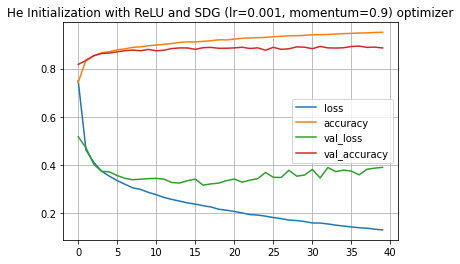

In [5]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_mom = history.history["loss"]
val_loss_mom = history.history["val_loss"]
train_acc_mom = history.history["accuracy"]
val_acc_mom = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and SDG (lr=0.001, momentum=0.9) optimizer')

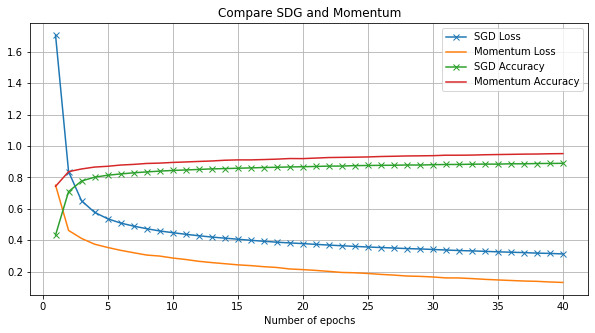

In [7]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_SGD, marker = 'x')
plt.plot(epoch_no, train_loss_mom)
plt.plot(epoch_no, train_acc_SGD, marker = 'x')
plt.plot(epoch_no, train_acc_mom)
plt.legend(["SGD Loss", "Momentum Loss","SGD Accuracy", "Momentum Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare SDG and Momentum")
plt.show()

Epoch 1/40
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7354 - accuracy: 0.7461 - val_loss: 0.5505 - val_accuracy: 0.8102
Epoch 2/40
1688/1688 [==============================] - 2s 952us/step - loss: 0.4526 - accuracy: 0.8414 - val_loss: 0.4263 - val_accuracy: 0.8518
Epoch 3/40
1688/1688 [==============================] - 2s 951us/step - loss: 0.4042 - accuracy: 0.8570 - val_loss: 0.4088 - val_accuracy: 0.8525
Epoch 4/40
1688/1688 [==============================] - 2s 950us/step - loss: 0.3702 - accuracy: 0.8680 - val_loss: 0.3658 - val_accuracy: 0.8652
Epoch 5/40
1688/1688 [==============================] - 2s 945us/step - loss: 0.3481 - accuracy: 0.8736 - val_loss: 0.3715 - val_accuracy: 0.8652
Epoch 6/40
1688/1688 [==============================] - 2s 939us/step - loss: 0.3308 - accuracy: 0.8793 - val_loss: 0.3509 - val_accuracy: 0.8727
Epoch 7/40
1688/1688 [==============================] - 2s 940us/step - loss: 0.3156 - accuracy: 0.8850 - val_loss: 0.3417 - v

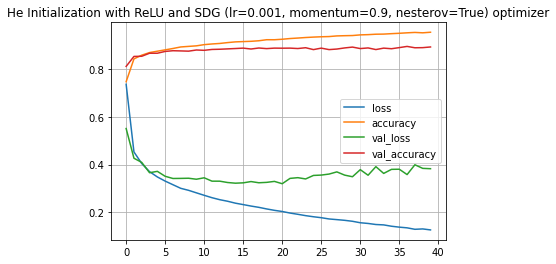

In [8]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer with nesterov is activated 
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_NAG = history.history["loss"]
val_loss_NAG = history.history["val_loss"]
train_acc_NAG = history.history["accuracy"]
val_acc_NAG = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and SDG (lr=0.001, momentum=0.9, nesterov=True) optimizer')

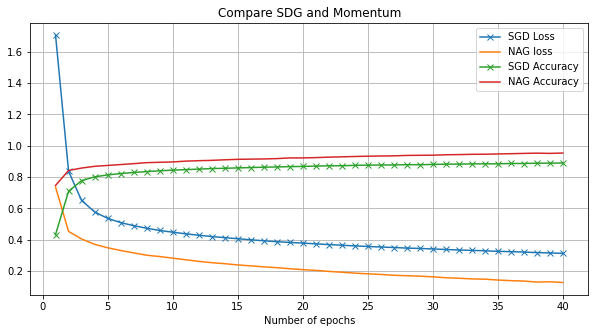

In [12]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_SGD, marker = 'x')
plt.plot(epoch_no, train_loss_NAG)
plt.plot(epoch_no, train_acc_SGD, marker = 'x')
plt.plot(epoch_no, train_acc_NAG)
plt.legend(["SGD Loss", "NAG loss","SGD Accuracy", "NAG Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare SDG and Momentum")
plt.show()

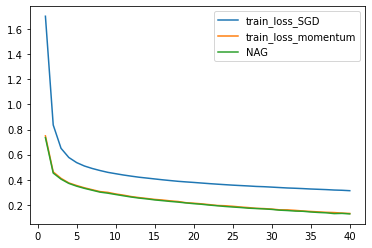

In [13]:
plt.plot(epoch_no, train_loss_SGD)
plt.plot(epoch_no, train_loss_mom)
plt.plot(epoch_no, train_loss_NAG)
plt.legend(["train_loss_SGD", "train_loss_momentum","NAG"])
plt.show()

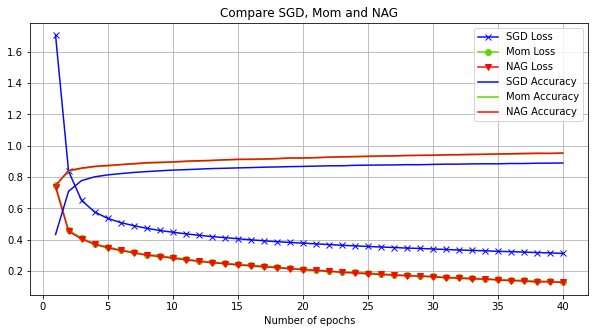

In [17]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_SGD, marker = 'x', color="#070bf2")
plt.plot(epoch_no, train_loss_mom, marker = 'o', color="#5fd406")
plt.plot(epoch_no, train_loss_NAG, marker = 'v', color="#fc0808")
plt.plot(epoch_no, train_acc_SGD, color="#070bf2")
plt.plot(epoch_no, train_acc_mom, color="#5fd406")
plt.plot(epoch_no, train_acc_NAG, color="#fc0808")
plt.legend(["SGD Loss", "Mom Loss","NAG Loss", "SGD Accuracy", "Mom Accuracy", "NAG Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare SGD, Mom and NAG")
plt.show()

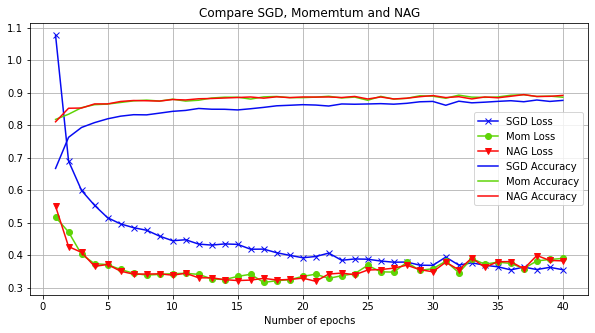

In [19]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, val_loss_SGD, marker = 'x', color="#070bf2")
plt.plot(epoch_no, val_loss_mom, marker = 'o', color="#5fd406")
plt.plot(epoch_no, val_loss_NAG, marker = 'v', color="#fc0808")
plt.plot(epoch_no, val_acc_SGD, color="#070bf2")
plt.plot(epoch_no, val_acc_mom, color="#5fd406")
plt.plot(epoch_no, val_acc_NAG, color="#fc0808")
plt.legend(["SGD Loss", "Mom Loss","NAG Loss", "SGD Accuracy", "Mom Accuracy", "NAG Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare SGD, Momemtum and NAG")
plt.show()

Epoch 1/40
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1734 - accuracy: 0.6106 - val_loss: 0.6999 - val_accuracy: 0.7642
Epoch 2/40
1688/1688 [==============================] - 2s 942us/step - loss: 0.6324 - accuracy: 0.7839 - val_loss: 0.5733 - val_accuracy: 0.8032
Epoch 3/40
1688/1688 [==============================] - 2s 936us/step - loss: 0.5539 - accuracy: 0.8111 - val_loss: 0.5373 - val_accuracy: 0.8133
Epoch 4/40
1688/1688 [==============================] - 2s 952us/step - loss: 0.5170 - accuracy: 0.8238 - val_loss: 0.5100 - val_accuracy: 0.8228
Epoch 5/40
1688/1688 [==============================] - 2s 951us/step - loss: 0.4943 - accuracy: 0.8293 - val_loss: 0.4893 - val_accuracy: 0.8285
Epoch 6/40
1688/1688 [==============================] - 2s 939us/step - loss: 0.4775 - accuracy: 0.8354 - val_loss: 0.4775 - val_accuracy: 0.8352
Epoch 7/40
1688/1688 [==============================] - 2s 969us/step - loss: 0.4641 - accuracy: 0.8392 - val_loss: 0.4680 - v

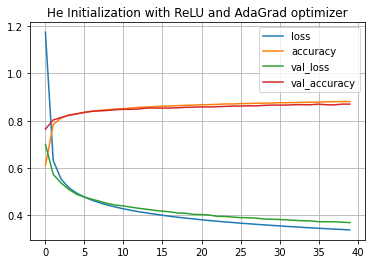

In [9]:
# ReLU goes with he initialization, AdaGrad optimizer
tf.random.set_seed(50)
np.random.seed(50)

optimizer=keras.optimizers.Adagrad(lr=0.001)
history = tune_opt_model(optimizer=optimizer, epochs = 40)

train_loss_adagrad = history.history["loss"]
val_loss_adagrad = history.history["val_loss"]
train_acc_adagrad = history.history["accuracy"]
val_acc_adagrad = history.history["val_accuracy"]

plot_result(history, name='He Initialization with ReLU and AdaGrad optimizer')

In [ ]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_adagrad, marker = 'x')
plt.plot(epoch_no, train_loss_rmsprop)
plt.plot(epoch_no, train_acc_adagrad, marker = 'x')
plt.plot(epoch_no, train_acc_rmsprop)
plt.legend(["Adagrad Loss", "RMSprop Loss","Adagrad Accuracy", "RMSprop Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare Adagrad and RMSprop")
plt.show()

In [ ]:
epoch_no = list(range(1,41))
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(epoch_no, train_loss_adagrad, marker = 'x', color="#070bf2")
plt.plot(epoch_no, train_loss_rmsprop, marker = 'o', color="#5fd406")
plt.plot(epoch_no, train_loss_adam, marker = 'v', color="#fc0808")
plt.plot(epoch_no, train_acc_adagrad, color="#070bf2")
plt.plot(epoch_no, train_acc_rmsprop, color="#5fd406")
plt.plot(epoch_no, train_acc_adam, color="#fc0808")
plt.legend(["Adagrad Loss", "RMSprop Loss","Adam Loss", "Adagrad Accuracy", "RMSprop Accuracy", "Adam Accuracy"])
plt.xlabel('Number of epochs')
#plt.ylim((0.2,1))
plt.title("Compare Adagrad, RMSprop and Adam")
plt.show()

## Regression task

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
def tune_opt_reg(optimizer):
  model_default = keras.models.Sequential()
  for n_layers in (100, 50, 10, 10, 10):
    model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                         input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
  model_default.add(keras.layers.Dense(1))
    
  model_default.compile(loss="mean_squared_error",
                        optimizer=optimizer)
  start_time = time.time()
  history = model_default.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))
  print("--- %s seconds ---" % (time.time() - start_time))
  return history

In [ ]:
# He Initialization with Randomized ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.SGD(lr=1e-3)
history = tune_opt_reg(optimizer=optimizer)

train_loss_SGD = history.history["loss"]
val_loss_SGD = history.history["val_loss"]

In [ ]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(42)
np.random.seed(42)

optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9)
history = tune_opt_reg(optimizer=optimizer)
plot_result(history, name='He Initialization with ReLU and SGD(lr=0.001, momentum=0.9) optimizer')

train_loss_momentum = history.history["loss"]
val_loss_momentum = history.history["val_loss"]

In [ ]:
# ReLU goes with he initialization, Nesterov SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(42)
np.random.seed(42)
optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
history = tune_opt_reg(optimizer=optimizer)

train_loss_nesterov = history.history["loss"]
val_loss_nesterov = history.history["val_loss"]

plot_result(history, name='He Initialization with ReLU and Nesterov SGD(lr=0.001, momentum=0.9) optimizer')

In [ ]:
train_loss = [train_loss_SGD, train_loss_momentum, train_loss_nesterov, train_loss_adagrad, train_loss_rmsprop, train_loss_adam, 
              train_loss_adamax, train_loss_nadam]
epoch_no = list(range(1,41))

In [ ]:
plt.plot(epoch_no, train_loss_SGD)
plt.plot(epoch_no, train_loss_momentum)
plt.legend(["train_loss_SGD", "train_loss_momentum"])
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
for opt in train_loss:
  plt.plot(epoch_no, opt)
plt.legend(["SGD", "Momentum","Nesterov", "Adagrad", "RMSprop", "Adam", "Adamax", "Nadam"])
plt.set_cmap("jet")
plt.ylabel('Train loss')
plt.xlabel('Number of epochs')
plt.ylim((0.2,1))
plt.title("Train loss by different optimizer")
plt.show()

In [ ]:
val_loss = [val_loss_SGD, val_loss_momentum, val_loss_nesterov, val_loss_adagrad, val_loss_rmsprop, val_loss_adam, 
              val_loss_adamax, val_loss_nadam]
plt.figure(figsize=(15,5))
for opt in val_loss:
  plt.plot(epoch_no, opt)
plt.legend(["SGD", "Momentum","Nesterov", "Adagrad", "RMSprop", "Adam", "Adamax", "Nadam"])
plt.ylabel('Validation loss')
plt.xlabel('Number of epochs')
plt.ylim((0.2,1))
plt.title("Validation set loss by different optimizer")
plt.show()